In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
X = df.iloc[:,1:6]
target = df['charges']

In [4]:
regions = pd.get_dummies(X['region'], drop_first = True)
X = X.drop('region', axis = 1)
X = pd.concat([X, regions], axis = 1)

smokers = pd.get_dummies(X['smoker'], drop_first = True)
X = X.drop('smoker', axis = 1)
X = pd.concat([X, smokers], axis = 1)

s = pd.get_dummies(X['sex'], drop_first = True)
X = X.drop('sex', axis = 1)
X = pd.concat([X, s], axis = 1)

#After dummies the X 
X.head()

,bmi,children,northwest,southeast,southwest,yes,male
0,27.900,0,0,0,1,1,0
1,33.770,1,0,1,0,0,1
2,33.000,3,0,1,0,0,1
3,22.705,0,1,0,0,0,1
4,28.880,0,1,0,0,0,1


In [5]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = X.values
X_std = StandardScaler().fit_transform(X)

In [6]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [7]:
[ n for n,i in enumerate(cum_var_exp) if i>90 ][0]
# Find the eigenvector beyond which 90% of the data is explained

5

In [8]:
# Call the PCA method with 5 components. 
pca = PCA(n_components= 5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

In [9]:
print(X_5d.shape)

(1338, 5)


In [10]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestRegressor

n = len(X_5d)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=2)
regr = RandomForestRegressor()
mse = []

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [11]:
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), target.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score) 

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring metho

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring metho

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\karth\anaconda3\envs\mb\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring metho

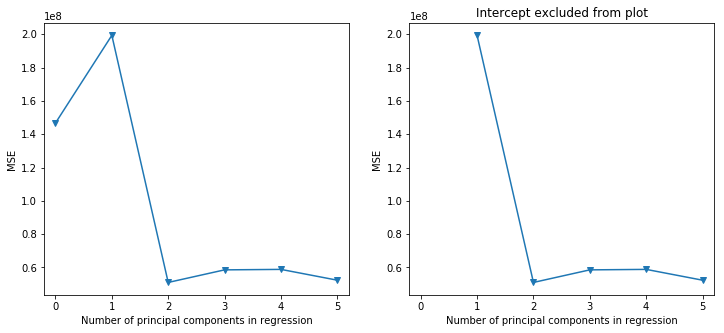

In [12]:
for i in np.arange(1,6):
    score = -1*cross_validation.cross_val_score(regr, X_5d[:,:i], target.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5], mse[1:6], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,5.2))

In [39]:
X_new = pd.DataFrame(X_5d)

In [14]:
X_new.head()

,0,1,2,3,4
0,-0.451386,1.670650,0.402051,-1.606338,1.747150
1,1.767925,-0.408360,0.056887,0.140578,-0.900130
2,1.636602,-0.374951,0.595615,1.592234,-0.409280
3,-1.729482,-1.394247,0.283252,-0.917163,-1.087760
4,-1.243194,-1.341320,0.240240,-0.660219,-1.403845


In [15]:
# copy the data
target = target.copy()
  
# apply normalization techniques
for i in target:
    target = target / target.abs().max()
    
target.head()

0    0.264777
1    0.027059
2    0.069773
3    0.344744
4    0.060637
Name: charges, dtype: float64

In [16]:
X_new = X_new.copy()
  
# apply normalization techniques
for column in X_new.columns:
    X_new[column] = X_new[column] / X_new[column].abs().max()
    
X_new.head()

,0,1,2,3,4
0,-0.124652,0.815774,0.139585,-0.420006,0.518882
1,0.488219,-0.199401,0.019750,0.036757,-0.267328
2,0.451954,-0.183087,0.206787,0.416319,-0.121551
3,-0.477603,-0.680807,0.098340,-0.239809,-0.323052
4,-0.343313,-0.654963,0.083407,-0.172626,-0.416925


In [17]:
final_df = pd.concat([X_new, target], axis = 1)
final_df.head()

,0,1,2,3,4,charges
0,-0.124652,0.815774,0.139585,-0.420006,0.518882,0.264777
1,0.488219,-0.199401,0.019750,0.036757,-0.267328,0.027059
2,0.451954,-0.183087,0.206787,0.416319,-0.121551,0.069773
3,-0.477603,-0.680807,0.098340,-0.239809,-0.323052,0.344744
4,-0.343313,-0.654963,0.083407,-0.172626,-0.416925,0.060637


In [18]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [19]:
clean_dataset(final_df)
final_df.head()

,0,1,2,3,4,charges
0,-0.124652,0.815774,0.139585,-0.420006,0.518882,0.264777
1,0.488219,-0.199401,0.019750,0.036757,-0.267328,0.027059
2,0.451954,-0.183087,0.206787,0.416319,-0.121551,0.069773
3,-0.477603,-0.680807,0.098340,-0.239809,-0.323052,0.344744
4,-0.343313,-0.654963,0.083407,-0.172626,-0.416925,0.060637


In [20]:
X = X_new
Y = final_df['charges']

In [21]:
X.head()

,0,1,2,3,4
0,-0.124652,0.815774,0.139585,-0.420006,0.518882
1,0.488219,-0.199401,0.019750,0.036757,-0.267328
2,0.451954,-0.183087,0.206787,0.416319,-0.121551
3,-0.477603,-0.680807,0.098340,-0.239809,-0.323052
4,-0.343313,-0.654963,0.083407,-0.172626,-0.416925


In [22]:
X.shape

(1338, 5)

In [23]:
Y.shape

(1338,)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state =0)

In [37]:
regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# performance for training set:
y_train_predict = regr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set:
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


RMSE is 0.05447671334234529
R2 score is 0.9155403386781639


The model performance for testing set:


RMSE is 0.11795957005977646
R2 score is 0.640577648533992


<function matplotlib.pyplot.show(*args, **kw)>

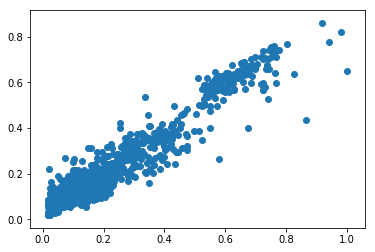

In [29]:
plt.scatter(Y_train,y_train_predict)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

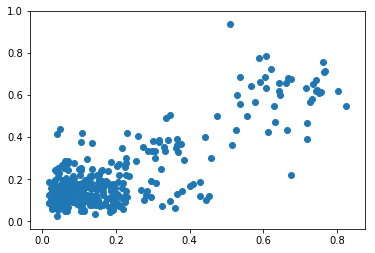

In [40]:
plt.scatter(Y_test,y_test_predict)
plt.show